#### importing libraries

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset ,DataLoader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### building the architecture of ANNS

In [3]:
class Model(nn.Module):
    def __init__(self,in_f=4,h1_f=8,h2_f=9,out_f=3):
        super().__init__()
        self.fc1=nn.Linear(in_f,h1_f)
        self.fc2=nn.Linear(h1_f,h2_f)
        self.fc3=nn.Linear(h2_f,out_f)
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        
        return x

In [4]:
model=Model()

In [5]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (fc3): Linear(in_features=9, out_features=3, bias=True)
)>

#### calculating the parameters of architecture

In [6]:
s=0
for param in model.parameters():
    print(param.numel())
    s=s+param.numel()
print("total parameters",s)

32
8
72
9
27
3
total parameters 151


In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

#### loading iris data from sklearn

In [8]:
iris=datasets.load_iris()

In [9]:
df=pd.DataFrame(iris.data)

In [10]:
df.columns=iris.feature_names

In [11]:
df['target']=iris.target

In [12]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [13]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
x=df.drop('target',axis=1).values

In [16]:
y=df['target'].values

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:

xtrain=torch.FloatTensor(xtrain)
xtest=torch.FloatTensor(xtest)
ytrain=torch.LongTensor(ytrain)
ytest=torch.LongTensor(ytest)

In [19]:
trainloader=DataLoader(xtrain,batch_size=60,shuffle=True,pin_memory=True)
# print(trainloader)
testloader=DataLoader(xtest,batch_size=60,shuffle=True,pin_memory=True)

In [20]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [21]:
import time
start=time.time()
epochs=100
losses=[]

for i in range(epochs):
    ypred=model.forward(xtrain)
    loss=criterion(ypred,ytrain)
    losses.append(loss)
    
    if i%10 ==0:
        print(f"epoch {i} loss {loss.item()}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


end=time.time()-start
print(f"total time for execution {end}")

epoch 0 loss 1.0827577114105225
epoch 10 loss 0.8296343088150024
epoch 20 loss 0.5513640642166138
epoch 30 loss 0.38617074489593506
epoch 40 loss 0.25420844554901123
epoch 50 loss 0.1470121443271637
epoch 60 loss 0.09316664189100266
epoch 70 loss 0.07266002148389816
epoch 80 loss 0.06461270898580551
epoch 90 loss 0.060821887105703354
total time for execution 0.20271015167236328


#### calculating the accuracy and other metrics 

In [25]:
correct=0
predicted=[]
actual=[]
with torch.no_grad():
    for i in range(len(xtest)):
        y_val=model.forward(xtest[i])
        predicted.append(y_val.argmax().item())
        actual.append(ytest[i])
        print(f"{y_val},predicted value {y_val.argmax().item()} , actual value {ytest[i]}")
        if y_val.argmax().item()== ytest[i]:
            correct+=1
    print(f"total correct predictions {correct} out of {len(xtest)}")
    print(f"accuray ={(correct/len(xtest))*100}")
        

tensor([-4.2073,  4.0185, -0.5124]),predicted value 1 , actual value 1
tensor([ 14.9198,   7.5720, -16.3129]),predicted value 0 , actual value 0
tensor([-16.1875,  -1.5247,  10.1830]),predicted value 2 , actual value 2
tensor([-4.4988,  3.6409, -0.0707]),predicted value 1 , actual value 1
tensor([-4.7292,  4.0929, -0.2697]),predicted value 1 , actual value 1
tensor([ 13.6281,   7.0310, -14.9913]),predicted value 0 , actual value 0
tensor([-0.4845,  4.8488, -3.5738]),predicted value 1 , actual value 1
tensor([-9.1192,  1.4568,  4.1995]),predicted value 2 , actual value 2
tensor([-6.8280,  2.2836,  2.2980]),predicted value 2 , actual value 1
tensor([-1.7202,  4.7740, -2.6640]),predicted value 1 , actual value 1
tensor([-7.8239,  2.0917,  2.9829]),predicted value 2 , actual value 2
tensor([ 13.1862,   6.5926, -14.3275]),predicted value 0 , actual value 0
tensor([ 15.4834,   7.4083, -16.5606]),predicted value 0 , actual value 0
tensor([ 13.2814,   6.7103, -14.4888]),predicted value 0 , act

In [23]:
len(xtest)

30

<AxesSubplot:title={'center':'confusion_matrix'}>

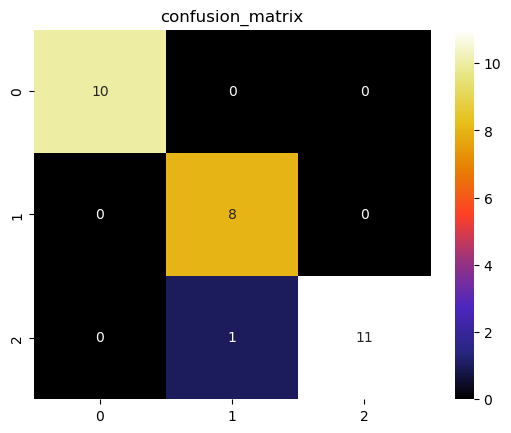

In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(predicted,actual)
import seaborn as sns
plt.figure()
plt.title("confusion_matrix")
sns.heatmap(cm,annot=True,cmap="CMRmap")